In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
from matplotlib.patches import Rectangle
import multiprocessing as mp
import time
import glob
import re
import random
from sklearn.model_selection import train_test_split
import torch

sys.path.insert(0, '/Data/user/panhailin/code/git_lab/npspy/')
import npspy as nps

In [10]:
clean_cm_df = pd.read_csv("../../../04.tables/classification/hp12/hp_clean.csv", index_col=0)
clean_cm_df.columns.name= 'pred'

valid_cm_df = pd.read_csv("../../../04.tables/classification/hp12/hp_valid.csv", index_col=0)
valid_cm_df.columns.name= 'pred'

In [11]:
clean_cm_df = clean_cm_df.div(clean_cm_df.sum(axis=1), axis=0)*100
valid_cm_df = valid_cm_df.div(valid_cm_df.sum(axis=1), axis=0)*100

In [12]:
diff_df = clean_cm_df - valid_cm_df
diff_df

pred,hp1_1,hp1_2,hp1_3,hp1_4,hp1_5,hp1_6,hp1_7,hp1_8,hp1_9,hp2_1,hp2_2,hp2_3,hp2_4,hp2_5,hp2_6
true,,,,,,,,,,,,,,,
hp1_1,0.883333,-0.200000,-0.016667,-0.083333,0.033333,0.033333,-0.016667,0.016667,-0.066667,-0.066667,-0.400000,-0.166667,-0.100000,-0.050000,0.200000
hp1_2,-0.583333,2.133333,0.100000,-0.150000,-0.050000,-0.050000,-0.066667,-0.083333,-0.116667,-0.166667,-0.083333,-0.200000,-0.016667,0.000000,-0.666667
hp1_3,-0.216667,0.016667,0.750000,-0.100000,0.050000,-0.166667,-0.050000,0.050000,0.216667,-0.100000,0.016667,-0.183333,0.066667,-0.250000,-0.100000
hp1_4,0.016667,-0.166667,0.250000,2.133333,-0.033333,-0.316667,-0.066667,-0.083333,0.350000,-0.550000,-0.116667,-0.216667,-0.083333,-0.183333,-0.933333
hp1_5,-0.183333,-0.066667,-0.033333,-0.150000,1.166667,0.100000,-0.050000,-0.033333,0.050000,0.016667,-0.183333,-0.366667,-0.316667,-0.066667,0.116667
hp1_6,0.016667,-0.016667,0.050000,-0.466667,-0.050000,1.033333,-0.066667,-0.366667,-0.116667,-0.050000,0.083333,-0.133333,0.150000,-0.100000,0.033333
hp1_7,-0.066667,-0.133333,-0.100000,-0.183333,-0.066667,-0.100000,1.616667,0.016667,-0.116667,-0.066667,-0.150000,-0.400000,-0.183333,0.033333,-0.100000
hp1_8,-0.066667,0.000000,0.200000,-0.316667,-0.033333,-0.116667,-0.016667,0.883333,-0.316667,-0.033333,-0.100000,-0.033333,0.033333,-0.083333,0.000000
hp1_9,-0.083333,-0.066667,-0.200000,-0.183333,-0.066667,-0.033333,-0.050000,-0.366667,1.500000,-0.133333,-0.033333,-0.250000,-0.016667,-0.116667,0.100000


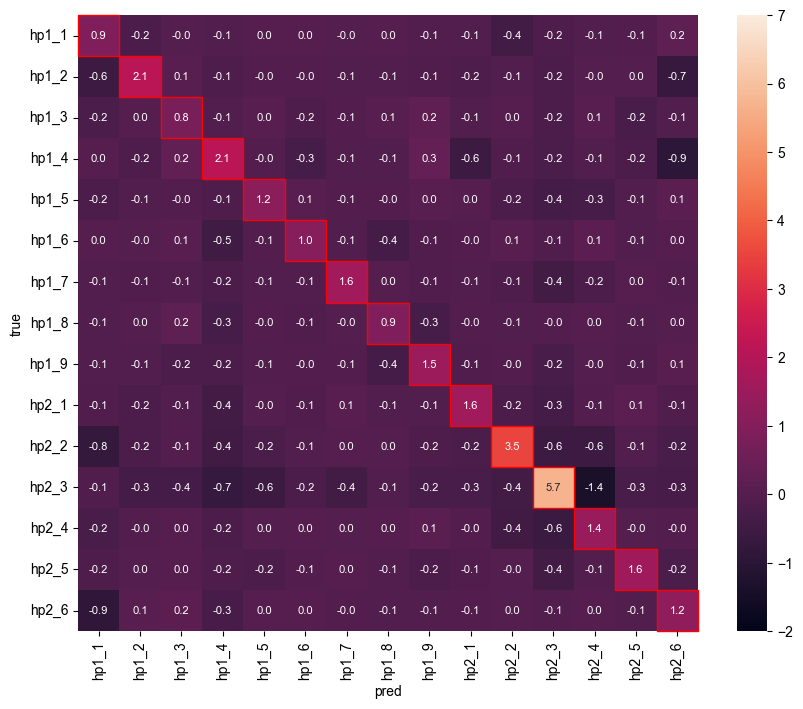

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(diff_df, annot=True, annot_kws={"size": 8.0}, fmt=".1f", ax=ax, vmin=-2, vmax=7,)
for i in range(len(diff_df)):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=1.0, clip_on=False))
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.savefig("../../../05.figures/classification/hp12/hp12_clean_valid_cm_diff.pdf")

In [45]:
# fig, ax = plt.subplots(figsize=(10,10))
# cmap = sns.cubehelix_palette(80, light=0.95, dark=0.15)
# vmax = 100
# sns.heatmap(clean_cm_df, annot=True, annot_kws={"size": 12.0}, cmap=cmap, fmt=".1f", ax=ax, vmin=0, vmax=vmax)

# for i in range(len(clean_cm_df)):
#     ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=1.0, clip_on=False))
# plt.yticks(rotation=0)
# plt.xticks(rotation=90)